# Exercise_01

## importing libraries

In [1]:
# opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

## 1.Read all content
Read all content of the folder (/dataset/images), Regardless of the file type and file name
in the folder using python. (use os.scandir() or os.listdir() )

### using os.scandir()

This code opens a directory using OS library and lists all its contents
The directory path is hardcoded as "C:/Users/BB/vision/DIP/EX02/dataset/images" Then, it loops through the directory items and prints their names
If an item is a directory or a file, its name will be printed. 

In [10]:


directory = os.scandir("C:/Users/BB/vision/DIP/EX02/dataset/images")
print('all content of the folder (/dataset/images):')

for obj in directory:
    if obj.is_dir() or obj.is_file():
        print(obj.name)
        
# Finally, when the loop is finished, the directory is closed. 
directory.close()

all content of the folder (/dataset/images):
a.jpg
b.jpg
c.jpg
d.png
e.jpg


### using os.listdir()

The following code retrieves the list of all files and folders in a directory.

In [3]:
# Path to the directory
directory_path = "C:/Users/BB/vision/DIP/EX02/dataset/images"

# List all files and folders in the directory
directory_list = os.listdir(directory_path)

# Print the list of files and folders in the directory
print('all content of the folder (/dataset/images):\n', directory_list)

all content of the folder (/dataset/images):
 ['a.jpg', 'b.jpg', 'c.jpg', 'd.png', 'e.jpg']


## 2.Check the type of image ( Color, gray or binary).


This code first reads each image file in the given directory using the cv2.imread function. Then, the checker_type function checks whether the image is a color image, a gray scale image, or a binary scale image. The function returns the type of the image and the image itself. 

Finally, the code creates three dictionaries- color_images, gray_images, and binary_images to store the images based on their type. The code loops through the directory list and checks the image type using the checker_type function. Based on the image type, the code adds the image to the appropriate dictionary- color_images, gray_images, or binary_images. It also prints the type of each image.


In [5]:
"""
We have defined a function called "checker_type" to identify 
the type of images in a given directory.
"""
def checker_type(image_name):
    # readin image
    path = 'dataset/images/' + image_name
    image = cv2.imread(path, -1)
    # checking image type
    if len(image.shape) > 2:
        return 'color image', image
    for row in image:
        for element in row:
            if element>0 and element<255:
                return 'gray scale image', image
    return 'binary scale image', image


"""
We then create empty dictionaries to store the images based on their type:
color, gray scale, or binary scale.
"""

color_images = {}
gray_images = {}
binary_images = {}


"""
We iterate through the directory_list to check the image type using
checker_type function for each image file.
"""

for file in directory_list:
    # we want image files
    if file.endswith('.jpg') or file.endswith('.png'):
        image = checker_type(file)
        image_type = image[0]
        if 'color' in image_type:
            # adding image in dict of color images
            color_images[file] = image[1] 
            print(f'{file} is {image_type}')
        
        elif 'gray' in image_type:
            # adding image in dict of grat images
            gray_images[file] = image[1] 
            print(f'{file} is {image_type}') 
        
        else:
            # adding image in list of binary images
            binary_images[file] = image[1] 
            print(f'{file} is {image_type}') 


a.jpg is gray scale image
b.jpg is color image
c.jpg is gray scale image
d.png is gray scale image
e.jpg is gray scale image


## 3. If the image is in color, convert it to grayscale, and then find the contrast of the image

This code is using the OpenCV and Matplotlib libraries to read a list of color images, convert them to grayscale, find the contrast of the images and display them along with the original color image and the contrasted image side by side using the Matplotlib "subplot" function. 

The code starts by getting the length of the list of color images and initializing a variable named "index" to 1. It then loops through the list of color images, converting each image to grayscale using the "cvtColor" function of OpenCV and saving it to a variable "gray_image". 

The code then finds contrasted version of the color image using the formula "contrasted_image = 255 - color_images[image]". The contrasted image is then displayed, along with the original color image and grayscale version using the "subplot" function of Matplotlib. 

After displaying each image, the value of "index" is incremented by 1 to ensure that the next set of images is displayed in the next row of the subplot.

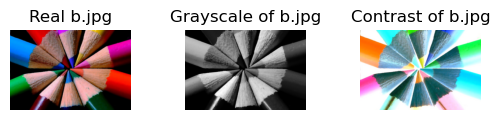

In [7]:
# Defining the number of rows in the output image and initializing the index
row = len(gray_images)
index = 1

# Looping through the color_images to convert them to grayscale and find their contrast
for image in color_images:
    # Converting the image to grayscale
    gray_image = cv2.cvtColor(color_images[image], cv2.COLOR_RGB2GRAY)
    
    # Finding the contrast of the image
    contrasted_image = 255 - color_images[image]
    
    # Displaying the results using matplotlib
    # First subplot: displaying the original color image
    plt.subplot(row,3,index)
    fixed_real = cv2.cvtColor(color_images[image], cv2.COLOR_BGR2RGB)
    plt.title(f'Real {image}')
    plt.imshow(fixed_real)
    plt.axis('off')
    index+=1
    
    # Second subplot: displaying the grayscale image
    plt.subplot(row,3,index)
    plt.title(f'Grayscale of {image}')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    index+=1
    
    # Third subplot: displaying the contrast image
    plt.subplot(row,3,index)
    fixed_contrast = cv2.cvtColor(contrasted_image, cv2.COLOR_BGR2RGB)
    plt.title(f'Contrast of {image}')
    plt.imshow(fixed_contrast)
    plt.axis('off')
    index+=1

## 4. If the image is in gray, convert it to binary, and then find the contrast of the image

The code starts by getting the length of the gray images list and sets an initial index to 1. Then, for each image in the gray images list, the following actions are performed:

1. Converting the image to binary using a threshold value of 127. This creates a black and white version of the image where pixel values above the threshold are set to white and below the threshold are set to black.

2. Finding the contrast of the image by inverting it. This is done by subtracting the gray image from 255. 

3. Displaying the results using the Matplotlib library. The code defines three subplots (side-by-side images) for each image. The first subplot shows the original gray image, the second shows the binary threshold version, and the third shows the contrasted version. The plt.subplot() function is used to specify the row, column and plot number for each subplot.

After displaying the results, the index is incremented by 1 to move to the next plot. The loop continues until all images in the list have been processed, and all the resulting subplots are shown in a single figure on a Matplotlib window.

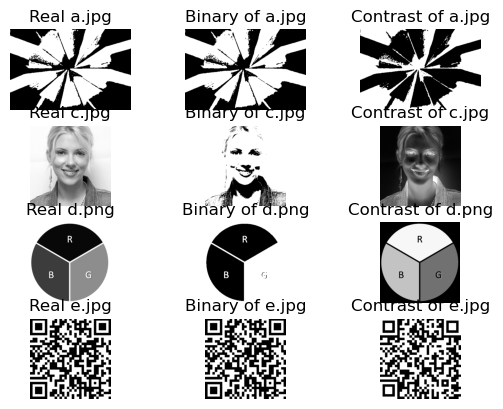

In [8]:
# Getting the length of the gray images list
row = len(gray_images)

# Setting the initial index to 1
index = 1

# Looping through each image in the gray images list
for image in gray_images:
    # Converting the image to binary
    binary = cv2.threshold(gray_images[image], 127, 255, cv2.THRESH_BINARY)
    binary_image = binary[1]
    
    # Finding the contrast of the image
    contrasted_image = 255 - gray_images[image]
    
    # Displaying the results
    plt.subplot(row, 3, index)
    plt.title(f'Real {image}')
    plt.imshow(gray_images[image], cmap='gray')
    plt.axis('off')
    index += 1
    
    plt.subplot(row, 3, index)
    plt.title(f'Binary of {image}')
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    index += 1
    
    plt.subplot(row, 3, index)
    plt.title(f'Contrast of {image}')
    plt.imshow(contrasted_image, cmap='gray')
    plt.axis('off')
    index += 1

## 5. If the image is binary, find the contrast of the image.

This code calculates the contrast of each image in an array of binary images. First, the number of rows in the binary_images array is calculated using the len() method and stored in the row variable. An initial index value is then set to 1.

Next, the code loops through each image in the binary_images array using a for loop. For each image, the pixel values are inverted to obtain its contrasted image using the formula contrasted_image = 255 - binary_images[image]. Then, both the image and its contrasted version are displayed side by side using matplotlib, with the subplot() method used to position the images based on the current index value. The index value is incremented by 2 after each iteration of the loop to ensure that the next pair of images is displayed in the next row.

In summary, this code uses matplotlib to display each binary image in an array along with its contrasted version, providing a visual representation of the contrast in each image.

In [9]:
# Calculate the number of rows in the binary images array
row = len(binary_images)

# Set an initial index value
index = 1

# Loop through each image in the binary_images array
for image in binary_images:
    # Invert the pixel values of the current image to obtain the contrasted image
    contrasted_image = 255 - binary_images[image]
    
    # Display the current image and its contrasted image side by side using matplotlib
    plt.subplot(row, 2, index)
    plt.title(f'Real {image}')
    plt.imshow(binary_images[image], cmap='gray')
    plt.axis('off')
    index += 1
    
    plt.subplot(row, 2, index)
    plt.title(f'Contrast of {image}')
    plt.imshow(contrasted_image, cmap='gray')
    plt.axis('off')
    index += 1